# NYC restaurants inspection - Data Challenge
Sarah Atwi, 20/02/2020

In [2]:
import scipy
import numpy as np
import matplotlib
import pandas as pd
import sklearn

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import datacompy


In [3]:
# Load dictionary
df1 = pd.read_excel (r'Data\Restaurant_Inspection_Open_Data_Dictionary_082214.xlsx', header=2)
#df2 = pd.read_excel (r'Data/Restaurant_Inspection_Open_Data_Dictionary_082214(1).xlsx')
#df3 = pd.read_excel (r'Data/Restaurant_Inspection_Open_Data_Dictionary_082214(1)(1).xlsx')
#df4 = pd.read_excel (r'Data/Restaurant_Inspection_Open_Data_Dictionary_082214(2).xlsx')
#df5 = pd.read_excel (r'Data/Restaurant_Inspection_Open_Data_Dictionary_082214(3).xlsx')

#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#Summarise the data
#shape
print(df1.shape)

df1.head


(19, 6)


<bound method NDFrame.head of    Dataset (File)        Data Field Name Data Type  Length  \
0      WEBEXTRACT                  CAMIS   Varchar    10.0   
1      WEBEXTRACT                    DBA   varchar   255.0   
2      WEBEXTRACT                   BORO   Varchar     1.0   
3      WEBEXTRACT               BUILDING   Varchar    10.0   
4      WEBEXTRACT                 STREET   Varchar   100.0   
5      WEBEXTRACT                ZIPCODE   Varchar     5.0   
6      WEBEXTRACT                  PHONE   Varchar    20.0   
7      WEBEXTRACT    CUISINE DESCRIPTION   Varchar   200.0   
8      WEBEXTRACT        INSPECTION DATE  Datetime     NaN   
9      WEBEXTRACT                 ACTION   Varchar   150.0   
10     WEBEXTRACT         VIOLATION CODE   Varchar     3.0   
11     WEBEXTRACT  VIOLATION DESCRIPTION   Varchar   600.0   
12     WEBEXTRACT          CRITICAL FLAG   Varchar     1.0   
13     WEBEXTRACT                  SCORE   Varchar     3.0   
14     WEBEXTRACT                  GRADE

In [7]:
#look at the dictionary
print(df1.describe())
df1

           Length
count   15.000000
mean    94.866667
std    161.968192
min      1.000000
25%      3.000000
50%     10.000000
75%    125.000000
max    600.000000


,Dataset (File),Data Field Name,Data Type,Length,Expected Values,Description
0,WEBEXTRACT,CAMIS,Varchar,10.0,NaN,This is a unique identifier for the entity (re...
1,WEBEXTRACT,DBA,varchar,255.0,NaN,This field represents the name (doing business...
2,WEBEXTRACT,BORO,Varchar,1.0,• 1 = MANHATTAN\n• 2 = BRONX\n• 3 = BROOKLYN\n...,Borough in which the entity (restaurant) is lo...
3,WEBEXTRACT,BUILDING,Varchar,10.0,NaN,This field represents the building number for ...
4,WEBEXTRACT,STREET,Varchar,100.0,NaN,This field represents the street name at which...
5,WEBEXTRACT,ZIPCODE,Varchar,5.0,NaN,Zip code as per the address of the entity (res...
6,WEBEXTRACT,PHONE,Varchar,20.0,NaN,Phone number
7,WEBEXTRACT,CUISINE DESCRIPTION,Varchar,200.0,NaN,This field describes the entity (restaurant) c...
8,WEBEXTRACT,INSPECTION DATE,Datetime,NaN,NaN,This field represents the date of inspection. ...
9,WEBEXTRACT,ACTION,Varchar,150.0,• Violations were cited in the following area(...,This field represents the action that is assoc...


In [8]:
#finding out what the results txt format is
f = open('Data/DOHMH_New_York_City_Restaurant_Inspection_Results_1_of_6.txt', 'r')
resultstest = f.readlines()
f.close()
resultstest

[',CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE\n',
 '0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Ã‚Âº F.,Critical,30.0,,,08/28/2017,Cycle Inspection / Initial Inspection\n',
 '1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,,,,08/28/2017,Administrative Miscellaneous / Initial Inspection\n',
 '2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained 

In [10]:
#read in inspection results
results0 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_1_of_6.txt', delimiter=',')
results1 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_2_of_6.txt', delimiter=',')
results2 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_3_of_6.txt', delimiter=',')
results3 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_5_of_6.txt', delimiter=',')
results4 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_6_of_6.txt', delimiter=',')

resultslist=[results0, results1, results2, results3, results4]


In [11]:
results1.shape
results1.dtypes


Unnamed: 0                 int64
CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

In [12]:
#explore results data structure
for resultnumber in resultslist :
    print((resultnumber).columns) 

Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')
Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')
Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')
Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCO

In [13]:
results=pd.concat(resultslist)

In [14]:
#look at the data
print(results.shape)

(333265, 19)


In [15]:
results.head()

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


In [16]:
results.columns

Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [17]:
results[['SCORE']]

,SCORE
0,30.0
1,NaN
2,2.0
3,46.0
4,18.0
...,...
66648,19.0
66649,11.0
66650,25.0
66651,12.0


In [18]:
results[['SCORE']].isnull().sum(axis = 0)

SCORE    19294
dtype: int64

In [38]:
results_subset = results[['BUILDING','INSPECTION DATE','INSPECTION TYPE','CUISINE DESCRIPTION','SCORE','CRITICAL FLAG', 'BORO']].copy()

In [31]:
print(results_subset.shape)
print(results_subset.columns)
results_subset

(333265, 7)
Index(['BUILDING', 'INSPECTION DATE', 'INSPECTION TYPE', 'CUISINE DESCRIPTION',
       'SCORE', 'CRITICAL FLAG', 'BORO'],
      dtype='object')


,BUILDING,INSPECTION DATE,INSPECTION TYPE,CUISINE DESCRIPTION,SCORE,CRITICAL FLAG,BORO
0,635,06/15/2015,Cycle Inspection / Initial Inspection,Italian,30.0,Critical,MANHATTAN
1,635,11/25/2014,Administrative Miscellaneous / Initial Inspection,Italian,NaN,Not Critical,MANHATTAN
2,2507,10/03/2016,Pre-permit (Operational) / Initial Inspection,Italian,2.0,Not Critical,QUEENS
3,11C,05/17/2017,Pre-permit (Operational) / Initial Inspection,Chinese,46.0,Critical,STATEN ISLAND
4,8015,03/30/2017,Cycle Inspection / Initial Inspection,American,18.0,Critical,BROOKLYN
...,...,...,...,...,...,...,...
66648,35,01/28/2016,Cycle Inspection / Initial Inspection,Jewish/Kosher,19.0,Critical,MANHATTAN
66649,21,02/29/2016,Cycle Inspection / Re-inspection,American,11.0,Critical,MANHATTAN
66650,1000S,01/05/2017,Pre-permit (Operational) / Initial Inspection,Japanese,25.0,Not Critical,MANHATTAN
66651,45,09/19/2014,Cycle Inspection / Re-inspection,American,12.0,Not Critical,STATEN ISLAND


In [39]:
#checking for any NA values to be cleaned
print(results_subset.isnull().values.any())
print(results_subset.isnull().sum().sum())

True
20337


In [40]:
results_subset.head

<bound method NDFrame.head of       BUILDING INSPECTION DATE  \
0          635      06/15/2015   
1          635      11/25/2014   
2         2507      10/03/2016   
3          11C      05/17/2017   
4         8015      03/30/2017   
...        ...             ...   
66648       35      01/28/2016   
66649       21      02/29/2016   
66650    1000S      01/05/2017   
66651       45      09/19/2014   
66652      359      11/15/2016   

                                         INSPECTION TYPE CUISINE DESCRIPTION  \
0                  Cycle Inspection / Initial Inspection             Italian   
1      Administrative Miscellaneous / Initial Inspection             Italian   
2          Pre-permit (Operational) / Initial Inspection             Italian   
3          Pre-permit (Operational) / Initial Inspection             Chinese   
4                  Cycle Inspection / Initial Inspection            American   
...                                                  ...                 ...   
6

In [41]:
#drop NaNs
results_clean=results_subset.dropna()

In [42]:
#CHecking if that was right, should spit out "False"
results_clean.isnull().values.any()
#lost about 20k rows ~6%, which we can afford

False

In [43]:
#Because there are objects, this will help encode names into integers for processing later
results_clean.dtypes

BUILDING                object
INSPECTION DATE         object
INSPECTION TYPE         object
CUISINE DESCRIPTION     object
SCORE                  float64
CRITICAL FLAG           object
BORO                    object
dtype: object

In [44]:
obj_results_clean = results_clean.select_dtypes(include=['object']).copy()
obj_results_clean.head()

,BUILDING,INSPECTION DATE,INSPECTION TYPE,CUISINE DESCRIPTION,CRITICAL FLAG,BORO
0,635,06/15/2015,Cycle Inspection / Initial Inspection,Italian,Critical,MANHATTAN
2,2507,10/03/2016,Pre-permit (Operational) / Initial Inspection,Italian,Not Critical,QUEENS
3,11C,05/17/2017,Pre-permit (Operational) / Initial Inspection,Chinese,Critical,STATEN ISLAND
4,8015,03/30/2017,Cycle Inspection / Initial Inspection,American,Critical,BROOKLYN
5,4339,03/03/2015,Pre-permit (Operational) / Compliance Inspection,Pakistani,Not Critical,QUEENS


In [49]:
#we will encode all objects to create floats useable in ML models later on
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
obj_results_clean["BUILDING_code"] = lb_make.fit_transform(obj_results_clean["BUILDING"])
print(obj_results_clean[["BUILDING", "BUILDING_code"]].head(11))

obj_results_clean["InsDate_code"] = lb_make.fit_transform(obj_results_clean["INSPECTION DATE"])
print(obj_results_clean[["INSPECTION DATE", "InsDate_code"]].head(11))

obj_results_clean["InsType_code"] = lb_make.fit_transform(obj_results_clean["INSPECTION TYPE"])
print(obj_results_clean[["INSPECTION TYPE", "InsType_code"]].head(11))

obj_results_clean["CritFlag_code"] = lb_make.fit_transform(obj_results_clean["CRITICAL FLAG"])
print(obj_results_clean[["CRITICAL FLAG", "CritFlag_code"]].head(11))

obj_results_clean["CD_code"] = lb_make.fit_transform(obj_results_clean["CUISINE DESCRIPTION"])
print(obj_results_clean[["CUISINE DESCRIPTION", "CD_code"]].head(11))

   BUILDING  BUILDING_code
0       635           5556
2      2507           3035
3       11C            593
4      8015           6283
5      4339           4580
6       256           3135
7      1122            402
8       480           4850
9       172           1826
10        5           4935
11    13858           1075
   INSPECTION DATE  InsDate_code
0       06/15/2015           656
2       10/03/2016          1099
3       05/17/2017           535
4       03/30/2017           327
5       03/03/2015           217
6       06/22/2017           688
7       06/14/2017           653
8       03/10/2015           245
9       10/06/2015          1108
10      08/13/2015           906
11      10/14/2015          1135
                                     INSPECTION TYPE  InsType_code
0              Cycle Inspection / Initial Inspection             3
2      Pre-permit (Operational) / Initial Inspection            13
3      Pre-permit (Operational) / Initial Inspection            13
4           

In [50]:
results_boroscore=results_clean[['SCORE', 'BORO']].copy()
results_coded=obj_results_clean[["BUILDING_code", "InsDate_code", "InsType_code", "CritFlag_code","CD_code"]].copy()

In [51]:
#creating a dataframe useable for ML analysis by encoding all the variables
results_an = pd.concat([results_coded, results_boroscore], axis=1)
results_an

,BUILDING_code,InsDate_code,InsType_code,CritFlag_code,CD_code,SCORE,BORO
0,5556,656,3,0,45,30.0,MANHATTAN
2,3035,1099,13,2,45,2.0,QUEENS
3,593,535,13,0,18,46.0,STATEN ISLAND
4,6283,327,3,0,2,18.0,BROOKLYN
5,4580,217,12,2,58,19.0,QUEENS
...,...,...,...,...,...,...,...
66648,3903,90,3,0,47,19.0,MANHATTAN
66649,2408,208,4,0,2,11.0,MANHATTAN
66650,15,10,13,2,46,25.0,MANHATTAN
66651,4678,1045,4,2,2,12.0,STATEN ISLAND


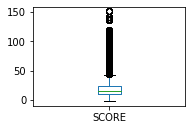

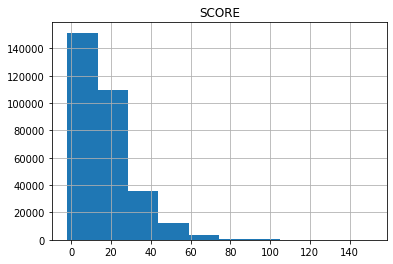

In [52]:
# box and whisker plots
results_an[['SCORE']].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

results_an[['SCORE']].hist()
pyplot.show()

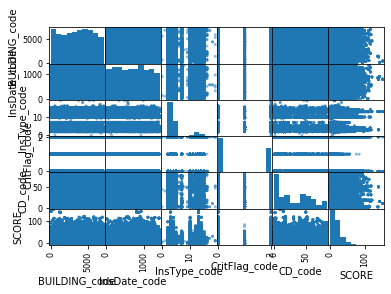

In [53]:
# scatter plot matrix
scatter_matrix(results_an)
pyplot.show()

In [ ]:
#results_clean['SCORE'].hist(by=results_clean['BORO'])
results_clean['SCORE'].hist(by=results_clean['CUISINE DESCRIPTION'])

# Evaluate Algorithm 
## The algorithm is designed to predict the score from the borough, cuisine type, and zipcode.

In [55]:
# Split-out validation dataset
array = results_an.values
array

array([[5556, 656, 3, ..., 45, 30.0, 'MANHATTAN'],
       [3035, 1099, 13, ..., 45, 2.0, 'QUEENS'],
       [593, 535, 13, ..., 18, 46.0, 'STATEN ISLAND'],
       ...,
       [15, 10, 13, ..., 46, 25.0, 'MANHATTAN'],
       [4678, 1045, 4, ..., 2, 12.0, 'STATEN ISLAND'],
       [3974, 1246, 3, ..., 26, 9.0, 'BROOKLYN']], dtype=object)

In [56]:
X = array[:,0:6]
Y = array[:,6]

In [57]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

Next step will be to try multiple different models, both linear and nonlinear to predict the score.

We don’t know which algorithms would be good on this problem or what configurations to use.

We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s test 6 different algorithms:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).
This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [58]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.399480 (0.000126)
LDA: 0.399293 (0.000351)
KNN: 0.547535 (0.001114)
CART: 0.921723 (0.001348)
NB: 0.396075 (0.001207)


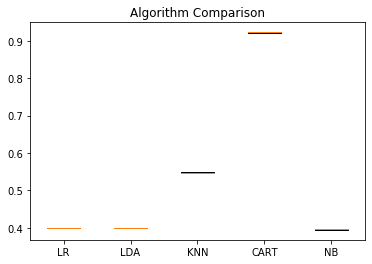

In [59]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

ValueError: supplied range of [-inf, 5.017279836814924] is not finite

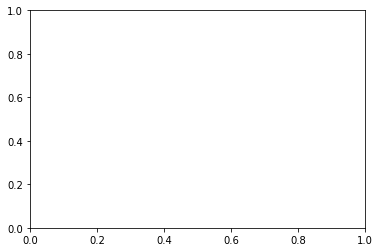

In [195]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

ValueError: Axis limits cannot be NaN or Inf

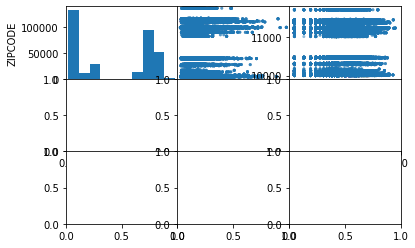